# 1. PCA

In [1]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset = 'train',
                                     remove = ('header', 'footers', 'quotes'),
                                     categories = categories)
newsgroups_test = fetch_20newsgroups(subset = 'test',
                                    remove = ('header', 'footers', 'quotes'),
                                    categories = categories)

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

cachedStopWords = stopwords.words('english')

from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

X_train = newsgroups_train.data
y_train = newsgroups_train.target

X_test = newsgroups_test.data
y_test = newsgroups_test.target

RegTok = RegexpTokenizer("[\w']{3,}")
english_stops = set(stopwords.words('english'))

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower())
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    features = (list(map(lambda token: PorterStemmer().stem(token), words)))
    return features

In [3]:
tfidf = TfidfVectorizer(tokenizer = tokenizer)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression()
LR_clf.fit(X_train_tfidf, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_tfidf, y_test)))

#Train set score: 0.992
#Test set score: 0.840


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2000, random_state = 7)
# PCA는 희소 벡터 형식에 대해 직접적인 연산 지원 X -> CountVectorizer, TfidfVectorizer를 toarray()로 변환.
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

print('Original tfidf matrix shape: ', X_train_tfidf.shape)
print('PCA Converted matrix shape: ', X_train_pca.shape)
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))

Original tfidf matrix shape:  (2034, 22742)
PCA Converted matrix shape:  (2034, 2000)
Sum of explained variance ratio: 1.000


In [15]:
LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

#Train set score: 0.992
#Test set score: 0.840


## Lasso

In [16]:
lasso_clf = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 1)
lasso_clf.fit(X_train_tfidf, y_train)

print('#Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf, y_test)))

#Train set score: 0.894
#Test set score: 0.787


In [17]:
import numpy as np

print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)),
     'out of', X_train_tfidf.shape[1])

#Used features count: 283 out of 22742


## Lasso와 동일하게 차원 축소

In [18]:
pca = PCA(n_components = 283, random_state = 7)

X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())
print('PCA Converted X shape: ', X_train_pca.shape)
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))

PCA Converted X shape:  (2034, 283)
Sum of explained variance ratio: 0.438


In [20]:
LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

#Train set score: 0.948
#Test set score: 0.828


## n_components = 100

In [22]:
pca = PCA(n_components = 100, random_state = 7)

X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())
print('PCA Converted X shape: ', X_train_pca.shape)
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))

PCA Converted X shape:  (2034, 100)
Sum of explained variance ratio: 0.251


In [23]:
LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

#Train set score: 0.908
#Test set score: 0.816


# 2. LSA

In [4]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 2000, random_state = 7)
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

In [6]:
print('LSA Converted X shape: ', X_train_lsa.shape)
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

LSA Converted X shape:  (2034, 2000)
Sum of explained variance ratio: 0.999


In [14]:
LR_clf.fit(X_train_lsa, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_lsa, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_lsa, y_test)))

#Train set score: 0.992
#Test set score: 0.840


In [15]:
svd = TruncatedSVD(n_components = 100, random_state = 1)
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print('LSA Converted X shape: ', X_train_lsa.shape)
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

LSA Converted X shape:  (2034, 100)
Sum of explained variance ratio: 0.249


In [16]:
LR_clf.fit(X_train_lsa, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_lsa, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_lsa, y_test)))

#Train set score: 0.908
#Test set score: 0.818


In [20]:
from sklearn.metrics.pairwise import cosine_similarity

print('#사용된 전체 카테고리:', newsgroups_train.target_names)
print('#첫 문서의 카테고리:', y_train[0])

sim_result = cosine_similarity([X_train_lsa[0]], X_train_lsa) 

print("#Top 20 유사도(lsa):\n", sorted(sim_result[0].round(2), reverse=True)[:20])
sim_index = (-sim_result[0]).argsort()[:20]
print('#Top 20 유사 뉴스의 인덱스(lsa):\n', sim_index)
sim_labels = [y_train[i] for i in sim_index]
print('#Top 20 유사 뉴스의 카테고리(lsa):\n', sim_labels)

#사용된 전체 카테고리: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
#첫 문서의 카테고리: 1
#Top 20 유사도(lsa):
 [1.0, 0.9, 0.85, 0.85, 0.85, 0.83, 0.82, 0.82, 0.8, 0.8, 0.79, 0.77, 0.76, 0.76, 0.74, 0.74, 0.71, 0.71, 0.69, 0.69]
#Top 20 유사 뉴스의 인덱스(lsa):
 [   0 1209  153 1674  651  998   25  501 1724 1826 1038 1545 1957 1290
  151  897 1575 1892  790  864]
#Top 20 유사 뉴스의 카테고리(lsa):
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [24]:
sim_result = cosine_similarity(X_train_tfidf[0], X_train_tfidf)

print("#Top 20 유사도(tfidf):\n", sorted(sim_result[0].round(2), reverse=True)[:20])
sim_index = (-sim_result[0]).argsort()[:20]
print('#Top 20 유사 뉴스의 인덱스(tfidf):\n', sim_index)
sim_labels = [y_train[i] for i in sim_index]
print('#Top 20 유사 뉴스의 카테고리(tfidf):\n', sim_labels)

#Top 20 유사도(tfidf):
 [1.0, 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.14, 0.14, 0.13, 0.13, 0.13, 0.13, 0.12, 0.12, 0.12, 0.11, 0.11, 0.11, 0.11]
#Top 20 유사 뉴스의 인덱스(tfidf):
 [   0 1892 1575 1545  651 1209 1636  998 1490   25 1664 1803  501 1578
  867  153 1577  874  537  429]
#Top 20 유사 뉴스의 카테고리(tfidf):
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## 잠재된 토픽 분석

In [26]:
svd = TruncatedSVD(n_components = 10, random_state = 1)
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print('LSA Converted X shape: ', X_train_lsa.shape)
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

LSA Converted X shape:  (2034, 10)
Sum of explained variance ratio: 0.062


In [30]:
terms = tfidf.get_feature_names_out()

def get_topics(model, feature_names, n = 10):
    for idx, topic in enumerate(model.components_):
        print('Topic %d: ' %(idx + 1),
             [feature_names[i] for i in topic.argsort()[:-n-1:-1]])

get_topics(svd, terms)

Topic 1:  ['edu', 'post', 'line', 'subject', 'organ', 'would', 'com', 'space', 'god', 'one']
Topic 2:  ['caltech', 'keith', 'schneider', 'cco', 'pasadena', 'allan', 'punish', 'california', 'edu', 'institut']
Topic 3:  ['god', 'sgi', 'sandvik', 'christian', 'kent', 'livesey', 'wpd', 'solntz', 'moral', 'jesu']
Topic 4:  ['sgi', 'livesey', 'wpd', 'solntz', 'com', 'jon', 'access', 'digex', 'nntp', 'host']
Topic 5:  ['sandvik', 'access', 'kent', 'digex', 'com', 'appl', 'cookamunga', 'tourist', 'newton', 'bureau']
Topic 6:  ['cwru', 'edu', 'univers', 'cleveland', 'reserv', 'western', 'kmr4', 'b64635', 'ryan', 'student']
Topic 7:  ['access', 'digex', 'pat', 'express', 'onlin', 'prb', 'commun', 'net', 'usa', 'god']
Topic 8:  ['nasa', 'cwru', 'space', 'gov', 'jpl', 'god', 'reserv', 'western', 'kmr4', 'kelvin']
Topic 9:  ['beauchain', 'bobb', 'ico', 'tek', 'vice', 'beaverton', 'tektronix', 'bronx', 'sank', 'manhattan']
Topic 10:  ['jpl', 'gov', 'nasa', 'kelvin', 'baalk', 'god', 'softwar', 'vnew'

In [67]:
svd.components_.argsort()[:-11:-1]

array([[ 3343, 19031,  4101, ..., 14418,  9887, 11933],
       [ 2995,  7415, 18436, ..., 10940,  4786,  4422],
       [ 9952,  8958, 11028, ..., 19031,  6855, 14418],
       ...,
       [19031, 14418,  8031, ..., 18001, 18436,  9819],
       [19031, 14418,  2995, ..., 18138, 12102,  5305],
       [20876,  1601, 16062, ..., 12827, 16305,  8031]])

In [68]:
svd.components_.argsort()

array([[20876,  1601, 16062, ..., 12827, 16305,  8031],
       [19031, 14418,  2995, ..., 18138, 12102,  5305],
       [19031, 14418,  8031, ..., 18001, 18436,  9819],
       ...,
       [ 9952,  8958, 11028, ..., 19031,  6855, 14418],
       [ 2995,  7415, 18436, ..., 10940,  4786,  4422],
       [ 3343, 19031,  4101, ..., 14418,  9887, 11933]])

## 단어 간 의미 유사도 분석

In [73]:
import numpy as np

In [74]:
tfidf = TfidfVectorizer(max_features = 1000, min_df = 5, max_df = 0.5)
X_train_tfidf = tfidf.fit_transform(X_train)

svd = TruncatedSVD(n_components = 100, random_state = 1)
X_train_lsa = svd.fit_transform(X_train_tfidf)

print('#components_의 shape:', svd.components_.shape)
print('#singular_values_의 shape:', svd.singular_values_.shape)
t_words = np.diag(svd.singular_values_).dot(svd.components_).T
print('#변환된 단어-잠재의미 행렬의 shape:', t_words.shape)

#components_의 shape: (100, 1000)
#singular_values_의 shape: (100,)
#변환된 단어-잠재의미 행렬의 shape: (1000, 100)


In [75]:
source = t_words[np.where(tfidf.get_feature_names_out() == 'space')[0][0]]

sim_result = cosine_similarity([source], t_words) #변환된 count vector와 기존 값들과의 similarity 계산

print("#Top 20 유사도(tfidf):", sorted(sim_result[0].round(2), reverse=True)[:20])
sim_index = (-sim_result[0]).argsort()[:20]
print('#Top 20 유사 뉴스의 인덱스(tfidf):', sim_index)
sim_labels = [tfidf.get_feature_names_out()[i] for i in sim_index]
print('#Top 20 유사 뉴스의 카테고리(tfidf):', sim_labels)

#Top 20 유사도(tfidf): [1.0, 0.65, 0.62, 0.61, 0.6, 0.58, 0.57, 0.54, 0.52, 0.51, 0.49, 0.49, 0.46, 0.46, 0.46, 0.45, 0.45, 0.44, 0.43, 0.43]
#Top 20 유사 뉴스의 인덱스(tfidf): [812 444 825 759 851 608  53 556 101 786 162 937  61 624 750 579 764 744
 627 430]
#Top 20 유사 뉴스의 카테고리(tfidf): ['space', 'international', 'station', 'sci', 'telescope', 'office', 'added', 'missions', 'area', 'shuttle', 'build', 'via', 'air', 'orbiter', 'satellites', 'near', 'section', 'russian', 'original', 'include']


# tSNE

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

In [82]:
from sklearn.manifold import TSNE

tfidf = TfidfVectorizer(tokenizer = tokenizer)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

tsne = TSNE(n_components = 2, random_state = 7)
tsne_tfidf = tsne.fit_transform(X_train_tfidf)
print('TSNE dimension: ', tsne_tfidf.shape)

def tsne_graph(tsne_2, label, lim = None):
    colors = {0: 'blue', 1: 'red', 2: 'green', 3: 'purple'}
    x = tsne_2[:, 0]
    y = tsne_2[:, 1]
    plt.figure(figsize = (15, 10))
    if lim == None:
        lim = [min(x), max(x), min(y), max(y)]
    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[2], lim[3])
    for i in range(len(x)):
        if (lim[0] < x[i] < lim[1]) and (lim[2] < y[i] < lim[3]):
            plt.text(x[i], y[i], label[i], color = colors[label[i]])
    plt.show()

/Users/mkw/opt/anaconda3/envs/serv1/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/mkw/opt/anaconda3/envs/serv1/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


TSNE dimension:  (2034, 2)


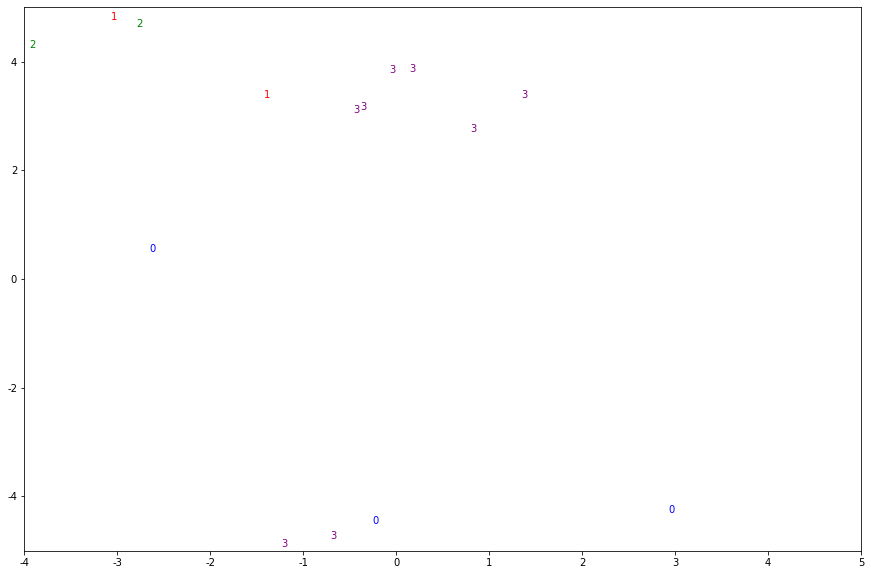

In [84]:
tsne_graph(tsne_tfidf, y_train, (-4, 5, -5, 5))

In [91]:
svd = TruncatedSVD(n_components = 100, random_state = 1)
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print('LSA Converted X shape: ', X_train_lsa.shape)
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

tsne_lsa = tsne.fit_transform(X_train_lsa)
print('TSNE dimension: ', tsne_lsa.shape)
print('#Selected categories: ', newsgroups_train.target_names)

LSA Converted X shape:  (2034, 100)
Sum of explained variance ratio: 0.249


/Users/mkw/opt/anaconda3/envs/serv1/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/mkw/opt/anaconda3/envs/serv1/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


TSNE dimension:  (2034, 2)
#Selected categories:  ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


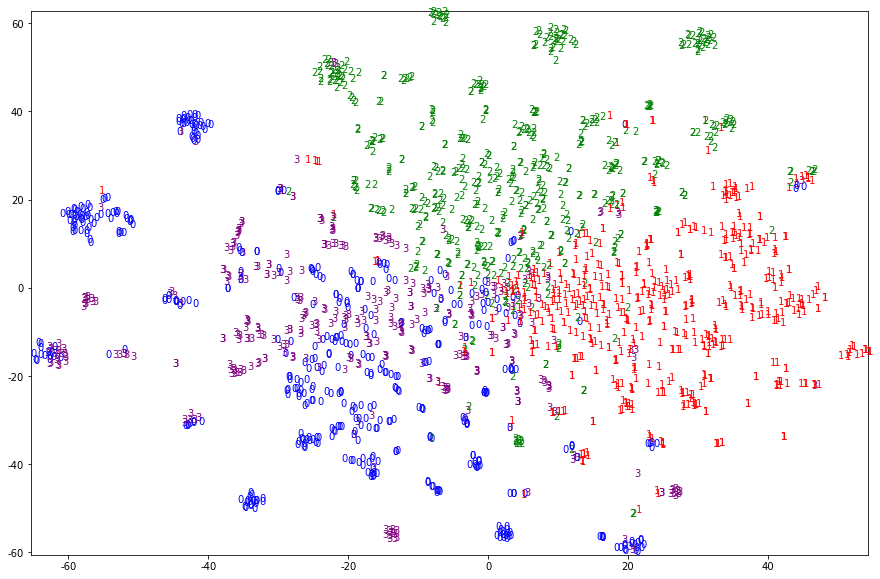

In [92]:
tsne_graph(tsne_lsa, y_train)